In [119]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Flatten,Dense
from keras.utils.np_utils import to_categorical
from keras.initializers import RandomNormal  #or xaiver/Hae normilization



# LOAD LIBRARIES
# USE KERAS WITH DEFAULT TENSORFLOW BACKEND
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.callbacks import LearningRateScheduler

In [120]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [121]:
def plot_confusion(confusion):

    for i in range(10):
        confusion[i][i] = 0
    
    plt.figure(figsize=(15,10))
    sns.heatmap(confusion,annot=True, linewidth = 1 , cmap="hot")

In [122]:
objects = mnist
(X_train, Y_train), (X_test, Y_test)=objects.load_data()

In [123]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


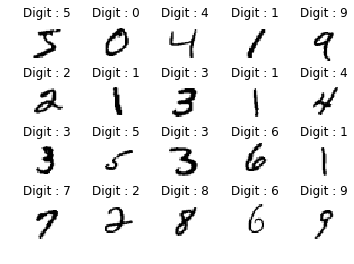

In [124]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(X_train[i],cmap='gray_r')
  plt.title("Digit : {}".format(Y_train[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

In [125]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [126]:
X_train = X_train/255
X_test = X_test/255

# here we are having a class number for each image
print("Class label of first image :", Y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(Y_train, 10) #one hot incoding
Y_test = np_utils.to_categorical(Y_test, 10)#one hot incoding

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [127]:
input_dim = X_train.shape[1]
input_dim

output_dim = 10
batch_size = 128 
epochs_num = 30
nets = 5

In [128]:
model_A = Sequential()

model_A.add(Dense(64, activation='sigmoid', input_shape=(input_dim,)))
model_A.add(Dense(32, activation='sigmoid'))
model_A.add(Dense(10, activation='softmax'))
model_A.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [129]:
model_B = Sequential()

model_B.add(Dense(64, activation='sigmoid', input_shape=(input_dim,)))
model_B.add(Dense(32, activation='sigmoid'))
model_B.add(Dense(10, activation='softmax'))
model_B.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [130]:
model_C = Sequential()

model_C.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_C.add(Dense(32, activation='relu'))
model_C.add(Dense(10, activation='softmax'))
model_C.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [131]:
model_D = Sequential()   

model_D.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_D.add(Dense(32, activation='relu'))
model_D.add(Dense(10, activation='softmax'))
model_D.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [132]:
model_E = Sequential()

model_E.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_E.add(Dense(32, activation='sigmoid'))
model_E.add(Dense(10, activation='softmax'))
model_E.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [133]:
##Making true results from Y_test back to a string

results3 = np.zeros(X_test.shape[0])

for i in range(10000):
    index_of_y_test = np.where(Y_test[i] == 1)
    results3[i] = int(index_of_y_test[0])

In [134]:
# DECREASE LEARNING RATE BY 0.95 EACH EPOCH
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

history = [0] * nets
results = [0] * nets

Test score: 0.12490737438201904
Test accuracy: 0.97079998254776


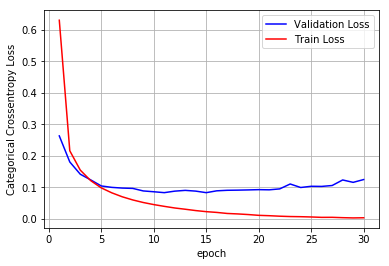

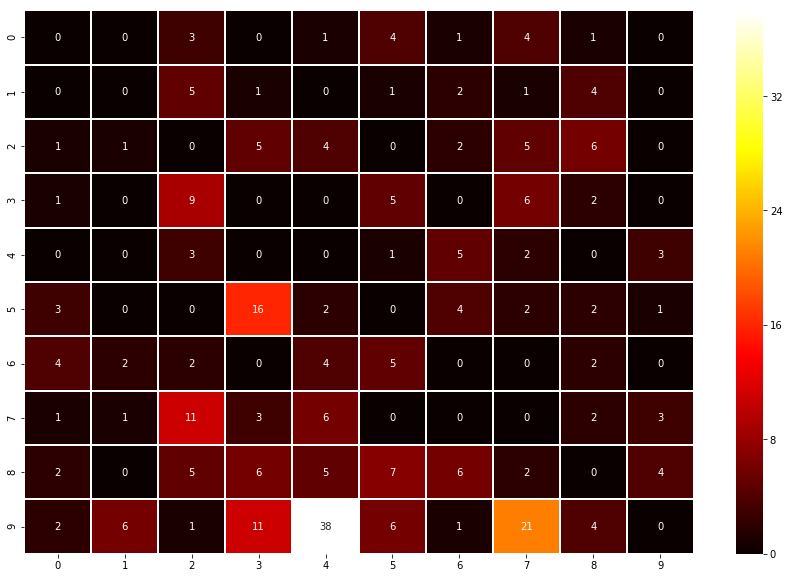

In [135]:
# TRAIN CNNs AND DISPLAY ACCURACIES
start_time = time.time()

history[0] = model_A.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[0] = model_A.predict(X_test)
results2 = np.argmax(results[0],axis = 1)
score = model_A.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[0].history['val_loss']
ty = history[0].history['loss']
plt_dynamic(x, vy, ty, ax)


confusion_0 = confusion_matrix(results3, results2)
plot_confusion(confusion_0)

Test score: 0.23930107057094574
Test accuracy: 0.9315999746322632


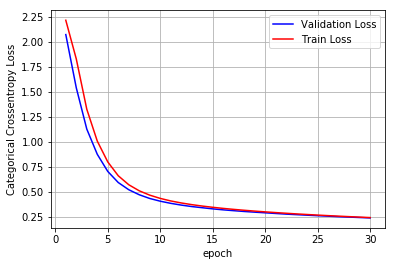

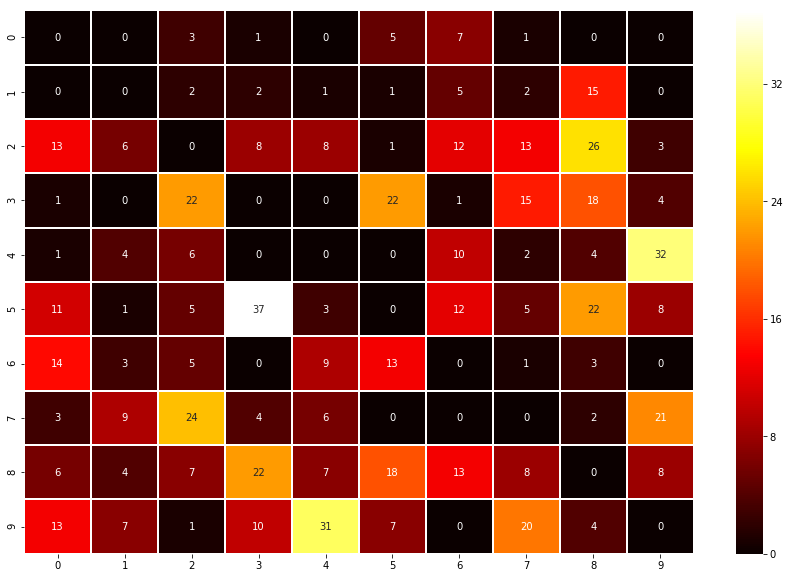

In [136]:
history[1] = model_B.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[1] = model_B.predict(X_test)
results2 = np.argmax(results[1],axis = 1)
score = model_B.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[1].history['val_loss']
ty = history[1].history['loss']
plt_dynamic(x, vy, ty, ax)

confusion_0 = confusion_matrix(results3, results2)
plot_confusion(confusion_0)

Test score: 0.14879785478115082
Test accuracy: 0.9767000079154968


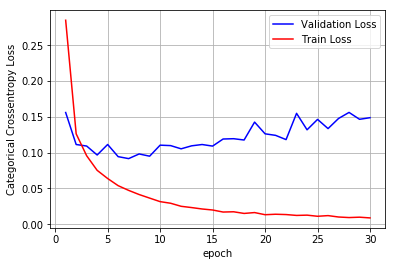

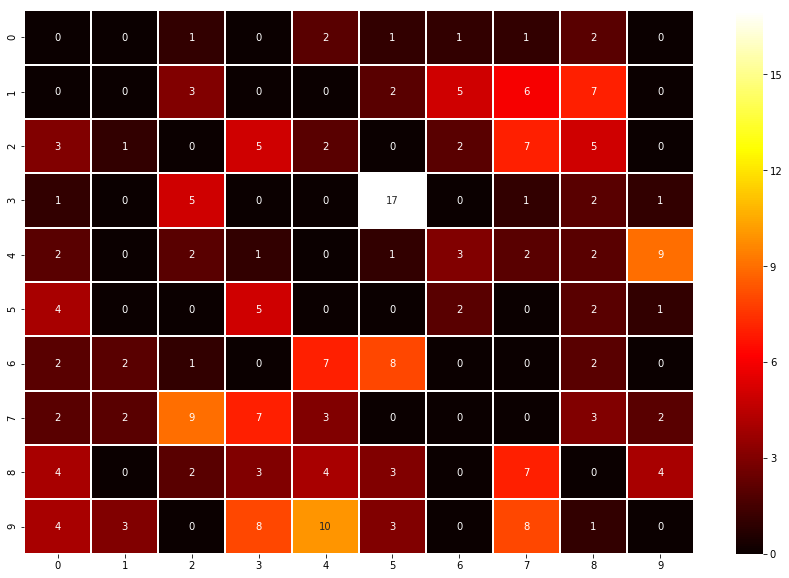

In [137]:
history[2] = model_C.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[2] = model_C.predict(X_test)
results2 = np.argmax(results[2],axis = 1)
score = model_C.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[2].history['val_loss']
ty = history[2].history['loss']
plt_dynamic(x, vy, ty, ax)

confusion_0 = confusion_matrix(results3, results2)
plot_confusion(confusion_0)

Test score: 0.09288620203733444
Test accuracy: 0.9739999771118164


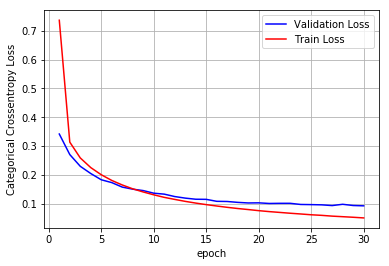

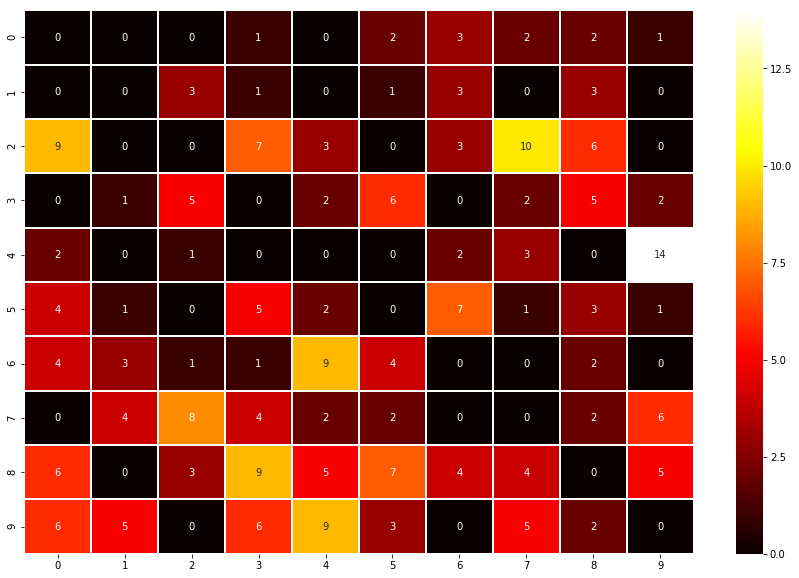

In [138]:
history[3] = model_D.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[3] = model_D.predict(X_test)
results2 = np.argmax(results[3],axis = 1)
score = model_D.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[3].history['val_loss']
ty = history[3].history['loss']
plt_dynamic(x, vy, ty, ax)

confusion_0 = confusion_matrix(results3, results2)
plot_confusion(confusion_0)

Test score: 0.11412093788385391
Test accuracy: 0.9739999771118164


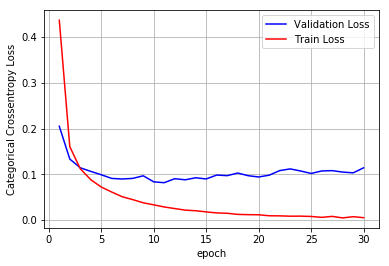

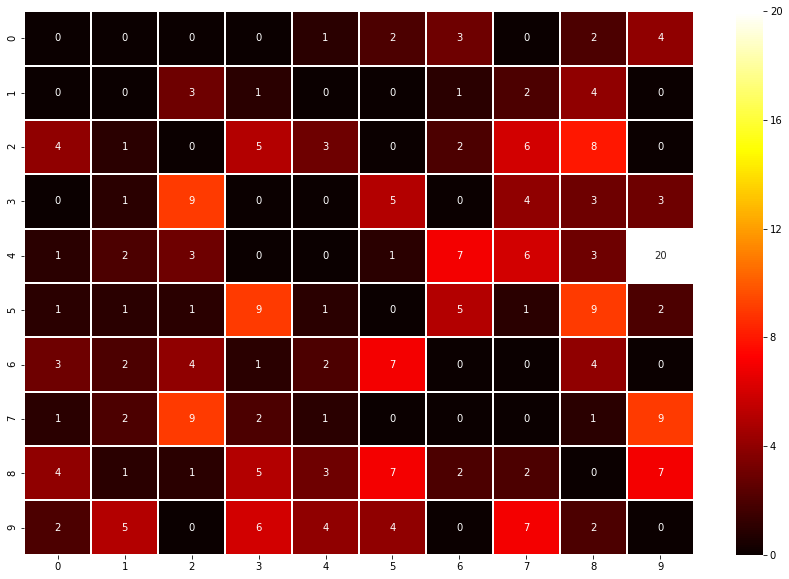

In [139]:
history[4] = model_E.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[4] = model_E.predict(X_test)
results2 = np.argmax(results[4],axis = 1)
score = model_E.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[4].history['val_loss']
ty = history[4].history['loss']
plt_dynamic(x, vy, ty, ax)

confusion_0 = confusion_matrix(results3, results2)
plot_confusion(confusion_0)

In [142]:
# PREDICT DIGITS FOR ENSEMBLE ON MNIST 10K TEST
results2 = np.zeros( (X_test.shape[0],10) )
for j in range(nets):
    results2 = results2 + results[j]
results2 = np.argmax(results2,axis = 1)
 
# CALCULATE ACCURACY OF ENSEMBLE ON MNIST 10K TEST SET    
c=0
for i in range(10000):
    index_of_y = np.where(Y_test[i] == 1)
    if results2[i]!=int(index_of_y[0]):
        c +=1
print("Ensemble Accuracy = %f" % (1-c/10000.))

Ensemble Accuracy = 0.981300


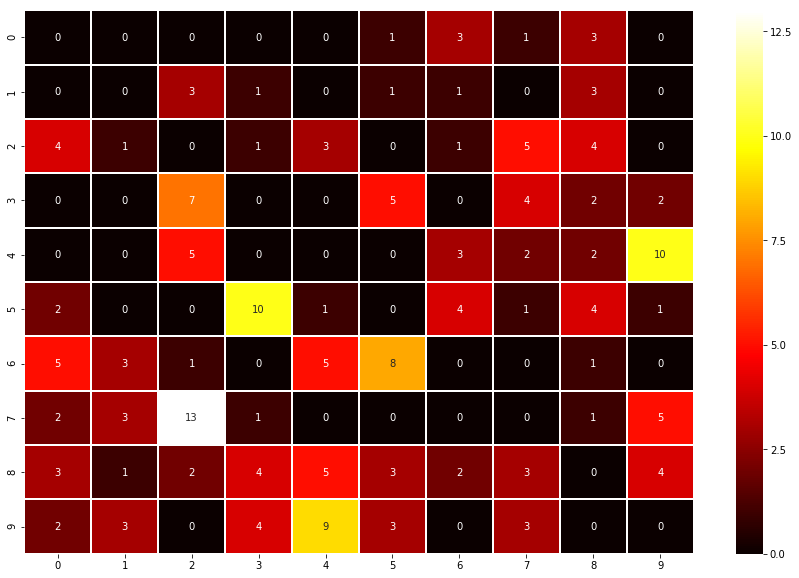

In [143]:
##Making an confusion map from ensemble

results3 = np.zeros(X_test.shape[0])

for i in range(10000):
    index_of_y_test = np.where(Y_test[i] == 1)
    results3[i] = int(index_of_y_test[0])
    
    
confusion_ensemble = confusion_matrix(results3, results2)

plot_confusion(confusion)